<h1>Симуляция A/B теста</h1>

<h3>VOLODYMYR CHUBAI</h3>
https://www.linkedin.com/in/volodymyr-chubai/

## Сценарий проекта
Я Junior Data Analyst, работаю в команде аналитиков данных. Продуктовый менеджер сформировал гипотезу, что новая версия экрана продаж будет лучше перформить по сравнению со старой, в связи с тем, что на новом экране продаж более понятно описаны преимущества платной версии приложения.

Продуктовый менеджер ожидает увеличение уровня конверсии из установки в покупку платной версии приложения. Приложение тем временем уже очень активно продвигается на рынке, каждый день привлекается в среднем по 30 000 новых пользователей, текущий уровень конверсии из установки в покупку 5%. Моя задача заключаеться в том, чтобы предложыить способ проверки данной гипотезы и указать какие инструменты и тесты нужно использовать в процессе проверки.

## PROCESS
### Подготовка рабочей среды
Я буду использовать Python для проверки данной гипотезы. Установлены следующие библиотеки:

In [2]:
import numpy as np
import pandas as pd

## ANALYSE

Я бы предложил провести A/B тест, где группе А будет показыватся старая версия экрана пронаж, а группе B - новая версия.

Цель планируемого A/B-теста: повысить Conversion Rate из установок в покупку платной версии приложения.

Вероятно, тестируемая функциональность повлияет не на одну целевую, а на ряд метрик. Поэтому мы смотрим на изменение в целом. Отслежывать будем всю воронку: просмотр - клик - установка - покупка. 

Формулируем гипотезу: "Ожидаем, что изменение старой версии экрана продаж вызовет рост Conversion Rate из установок в покупку с 5% до 8%, то есть на 60%"

Статистические методы работают от обратного - мы не можем с их помощью доказать, что гипотеза верна. Поэтому после формулирования общей гипотезы определяем две статистические. Они помогут понять: наблюдаемая разница между контрольной группой и тестовой - это случайность или результат изменений.

Нулевая гипотеза (H0): изменение старой версии экрана продаж на новую версию не повлияет на уровень конверсии из установок в покупку платной версии приложения. Conversion Rate из установок в покупку для групп A и B на самом деле не отличается, и наблюдаемые различия случайны.
Альтернативная гипотеза (H1): изменение старой версии экрана продаж увеличит уровень конверсии из установок в покупку. Conversion Rate из установок в покупку платной версии приложения в группе B выше, чем в группе A, и эти различия - результат изменений.

Используя калькулятор Эвана Миллера расчитываем размер выборки. Текущий уровень конверсии из установки в покупку составляет 5%, мы хотим увеличить этот показатель минимум на 60%. При уровне доверия 95% получаем 894 пользователей на группу.

894 * 2 = 1788 - общее количество необходимых пользователей

1788 / 30000 = 0,06 - примерной количество дней эксперимента

При том же обьеме трафика в 30000 пользователей, тест грубо говоря, можно закончить менее чем за день. Но этот вывод не учитывает недельную сезонность. Поведение пользователей отличается в разные дни недели. Поэтому длительность теста мы округляем до недели, чтобы учесть сезонность.

Также важно после запуска A/B-теста учитывать проблему подгядывания.
Кроме того, чтобы не сомневаться в достоверности результатов можно проводить тест с контрольной выборкой. Для этого нужно разделить аудиторию не на две групы (A/B), а на три (A/A/B). Это выявит, повлияли ли внешние факторы на результат теста. Если показатели групп A и A не отличаются или совсем немного, то внешние факторы не повлияли на результат и данным можно доверять.

### Симулируем тест моделируя ситуацию с минимальным эффектом

In [3]:
mde = 0.03          # минимальный обнаруживаемый эффект
baseline = 0.05     # базовый коэффициент конверсии
sample_size = 894   # размер выборки

In [4]:
# генерируем 0 и 1, 1 будет генерироватся с вероятностю 5%
np.random.binomial(1,baseline,size=sample_size).mean()

0.05592841163310962

In [5]:
# моделируем распределение где присутствует минимальный эффект
np.random.binomial(1,baseline + mde,size=sample_size).mean()

0.08501118568232663

### Z test
H0: разницы между группами нет

In [6]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
from statsmodels.stats.proportion import proportions_ztest

In [7]:
a = np.random.binomial(1,baseline,size=sample_size)
b = np.random.binomial(1,baseline + mde,size=sample_size)
proportions_ztest([a.sum(), b.sum()], [len(a), len(b)],)
# второе значение - p-value

(-3.4017717807318966, 0.0006695052147475898)

Минимальные эффект есть, поэтому можно отклонить нулевую гипотезу на основе p-value

In [8]:
from tqdm.notebook import tqdm

In [9]:
result = []
for _ in tqdm(range(100000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)],)
    result.append(pval)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [10]:
t = pd.Series(result)
# распределение p-value

<AxesSubplot:>

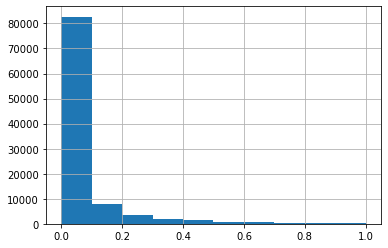

In [11]:
t.hist()
# в основном, p-value ближе к 0

In [12]:
(t < 0.05).mean()
# мощность - процент уверенности в том, что результаты теста верны

0.73423

### T test

In [13]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
from scipy.stats import ttest_ind

In [14]:
result = []
for _ in tqdm(range(100000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = ttest_ind(a,b,equal_var=False)
    result.append(pval)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [15]:
t = pd.Series(result)

In [16]:
(t < 0.05).mean()
# примерно такая же мощность как в z test

0.73559